In [1]:
#%matplotlib notebook
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy import units as u
from astropy.coordinates import SkyCoord

In [2]:
Name='photoz_cosmos2020_lephare_classic_v1.out.fits'
path=r'C:\Users\blue\Desktop\Python\Cosmos2020'


hdul = fits.open(os.path.join(path,Name))
#hdul.info()
data = hdul[1].data
#hdul2 = fits.open(os.path.join(path,'COSMOS2015_Laigle+_v1.1.fits'))
#hdul2.info()
#data2 = hdul2[1].data
#hdul[0].header


Name2='COSMOS2020_CLASSIC_v1.5_formatted.fits'

hdul2 = fits.open(os.path.join(path,Name2))
#hdul2.info()
data2 = hdul2[1].data


Name3='zphot_clean.pdz.fits'
hdul3 = fits.open(os.path.join(path,Name3))
#hdul3.info()

data3 = hdul3[0].data

In [ ]:
data2['HSC_g_FLUXERR_AUTO']

In [ ]:
from astropy.table import Table

table = Table.read(os.path.join(path,Name2))#, memmap=True)

In [ ]:
table[0:10]

In [3]:
z=[float('NaN')] * len(data)
zpdf=[float('NaN')] * len(data)
idx=[float('NaN')] * len(data)
a=[float('NaN')] * len(data)
d=[float('NaN')] * len(data)
G=[float('NaN')] * len(data)
R=[float('NaN')] * len(data)
I=[float('NaN')] * len(data)
J=[float('NaN')] * len(data)
H=[float('NaN')] * len(data)
K=[float('NaN')] * len(data)

In [4]:
for i in range(0,len(data)):
    if data[i][3]<=1.0:
        continue
    elif data[i][3]==0:
        continue
    elif data[i][3]>=10.0:
        continue
    else:
        idx[i]=data[i][0]#id
        a[i]=data[i][1]#alpha J2000, in deg
        d[i]=data[i][2]#delta J2000, in deg
        z[i]=data[i][3]#redshift, median of the likelihood distribution. 
        #zpdf[i]=data3[i]#the pdf for the photometric redshift
        
        G[i]=data[i][28]#g Subaru HSC
        R[i]=data[i][29]#r Subaru HSC
        I[i]=data[i][30]#i Subaru HSC
        J[i]=data[i][33]#J VISTA
        H[i]=data[i][34]#H VISTA
        K[i]=data[i][35]#K VISTA
        
        

In [6]:
z=np.array(z)
#zpdf=np.array(zpdf)
idx=np.array(idx)
a=np.array(a)
d=np.array(d)
G=np.array(G)
R=np.array(R)
I=np.array(I)
#Z=np.array(Z)
J=np.array(J)
H=np.array(H)
K=np.array(K)

In [7]:
idx[0]

nan

In [8]:
#Remove nan
znan=z[~np.isnan(z)]
idxnan=idx[~np.isnan(z)]-1
anan=a[~np.isnan(z)]
dnan=d[~np.isnan(z)]
Gnan=G[~np.isnan(z)]
Rnan=R[~np.isnan(z)]
Inan=I[~np.isnan(z)]
#Znan=Z[~np.isnan(z)]
Jnan=J[~np.isnan(z)]
Hnan=H[~np.isnan(z)]
Knan=K[~np.isnan(z)]

In [9]:
idxlist=idxnan.tolist()
idxlist = [int(i) for i in idxlist]
zpdf=data3[idxlist]

In [10]:
print(len(zpdf)-len(znan))

0


450


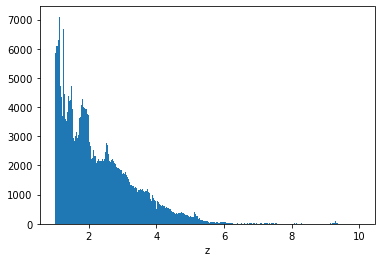

In [11]:
#hist=plt.hist(z,bins='auto')

binwidth=0.02
#print(np.arange(min(znan[idxcatalog[ch]]), max(znan[idxcatalog[ch]]) + binwidth, binwidth))
plt.figure()
counts, edges, plot=plt.hist(znan,bins=np.arange(min(znan), max(znan) + binwidth, binwidth))
plt.xlabel('z')
bincenters = np.mean(np.vstack([edges[0:-1],edges[1:]]), axis=0)
print(len(bincenters))

In [12]:
#dc=-3
#print(zcand[dc])
#150.184235 2.035242
#2.23224
bc=61
zsearch=bincenters[bc]#np.median(znan[idxcatalog[ch]])#redshift used to search for cluster
print(bincenters[bc])
#print(len(znan[znan>4.]))
zsiz=binwidth#0.1#allowed difference in z 

ztemp=znan[znan<zsearch+zsiz]
zlook=ztemp[ztemp>zsearch-zsiz]#array of z for the clusters

zpdftemp=zpdf[znan<zsearch+zsiz]
zpdflook=zpdftemp[ztemp>zsearch-zsiz]

atemp=anan[znan<zsearch+zsiz]
alook=atemp[ztemp>zsearch-zsiz]#array of alpha for the clusters

dtemp=dnan[znan<zsearch+zsiz]
dlook=dtemp[ztemp>zsearch-zsiz]#array of delta for the clusters

2.2301000165939344


2.240999937057495


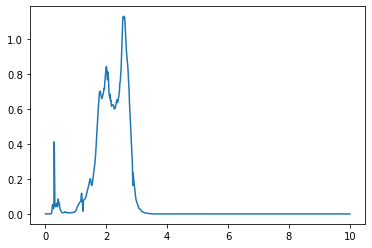

In [18]:
print(zlook[1])
plt.plot(zrange,zpdflook[1])

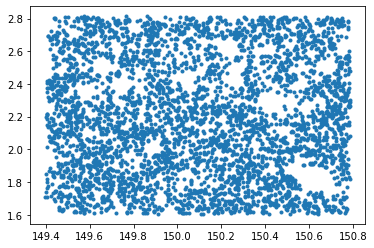

4255


In [14]:
plt.plot(alook,dlook,'.')
plt.show()
print(len(alook))

# Machine learning for clusters

In [ ]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN

# define dataset

corr=[0]*len(alook)
for i in range(0,len(alook)):
    corr[i]=[alook[i], dlook[i],zlook[i]]
#print(corr)

X=np.array(corr)#[alook,dlook]
#X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
print(X)

In [ ]:

# define the model
model = Birch(threshold=0.01, n_clusters=10)#GaussianMixture(n_components=10)#Birch(threshold=0.01, n_clusters=100)#
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)

#DBSCAN model
#model = DBSCAN(eps=0.30, min_samples=100)
# fit model and predict clusters
#yhat = model.fit_predict(X)

print(yhat)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)#np.array(np.where(yhat == cluster))
    #print(row_ix)
    # create scatter of these samples
    #plt.plot(X[row_ix[0]][0][0], X[row_ix[0]][0][1],'.')
    pyplot.scatter(X[row_ix,0], X[row_ix,1])
# show the plot
pyplot.show()

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import hdbscan
#projection = TSNE().fit_transform(X)
#'eom' and 'leaf'
#min_samples=10
clusterer = hdbscan.HDBSCAN(min_cluster_size=10,min_samples=10,cluster_selection_epsilon=0,cluster_selection_method='leaf',
                            prediction_data=True).fit(X)

color_palette = sns.color_palette('Paired', 100)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.figure()
plt.scatter(alook,dlook, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)
#plt.plot(150.35,2.33,'.')
#plt.plot(acand[dc], dcand[dc],'.')
plt.xlabel('alpha')
plt.ylabel('delta')


In [ ]:
fig=plt.figure()
#ax2 = fig.add_subplot(111, projection='3d')
ax2=Axes3D(fig)
ax2.scatter3D(alook,dlook,zlook, s=50, linewidth=0, c=cluster_member_colors, alpha=0.5)
plt.show()


In [ ]:
#clusterer.labels_
#clusterer.labels_.max()
Nclu=[0]*(clusterer.labels_.max()+1)
zclu=[0]*(clusterer.labels_.max()+1)

zlook

for i in range(0,clusterer.labels_.max()+1):
    Nclu[i] = np.count_nonzero(clusterer.labels_ == i)
    zclu[i] = np.median(zlook[clusterer.labels_ == i])
    
print(Nclu)
print(zclu)


In [ ]:
#sky position of cluster
catalog = SkyCoord(ra=anan*u.degree, dec=dnan*u.degree)  
#print(catalog)
#goes through all alpha,delta points chosen       


#get median/mean position of clusters
clustercorr=[0]*(clusterer.labels_.max()+1)
clusterlog=[0]*(clusterer.labels_.max()+1)
#(clusterer.labels_.max()+1)
clusterrad=[0]*(clusterer.labels_.max()+1)
for i in range(0,clusterer.labels_.max()+1):
    clustercorr[i] = [np.median(alook[clusterer.labels_ == i]),np.median(dlook[clusterer.labels_ == i])]
    clusterlog[i] = [alook[clusterer.labels_ == i],dlook[clusterer.labels_ == i]]
    #clusterlog[i] = SkyCoord(ra=alook[clusterer.labels_ == i]*u.degree,dec=dlook[clusterer.labels_ == i]*u.degree)
    clusterdist=[0]*Nclu[i]
    for w in range(0,Nclu[i]):
        clusterdist[w] = np.sqrt((clusterlog[i][0][w]-clustercorr[i][0])**2+(clusterlog[i][1][w]-clustercorr[i][1])**2)
    clusterrad[i]=np.max(clusterdist)

arrlength=len(anan)
#print(arrlength)
idxcatalog=[float('NaN')] * arrlength
q=0

for i in clustercorr:
        scalarc = SkyCoord(i[0]*u.deg, i[1]*u.deg) 
        d2d = scalarc.separation(catalog)#gives distance to all objects on the sky
        siz = clusterrad[q]#scalarc.separation(clusterlog[q])#gives distance to cluster objects
        #print(siz)
        catalogmsk = d2d < (siz)*u.deg#multiply by 0.5???
        idxcatalog[q] = [np.where(catalogmsk)[0]]
        print(idxcatalog[q])
        q=q+1
#One entry in idxcatalog gives all the objects included in the search area, centered around a cluster

#Try to define i as the center position of the cluster (we have idx so we can calculate the mean/median) then define catalog
#as the cluster positions and calculate the separation. Lastly a mask can be applied using the maximum distance from the center
#(plus a bit maybe to include the farthest point?) and then all the redshift peaks and color plots. Remember the full catalog
#is still needed for 

In [ ]:
import pandas as pd
sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)

In [ ]:
threshold = pd.Series(clusterer.outlier_scores_).quantile(0.9)
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]
plt.scatter(*X.T, s=50, linewidth=0, c='gray', alpha=0.25)
plt.scatter(*X[outliers].T, s=50, linewidth=0, c='red', alpha=0.5)

# Over density plots with Weighted Adaptive Kernel Estimator

In [ ]:
def findXPoint(xa,xb,ya,yb,yc):
    m = (xa - xb) / (ya - yb)
    xc = (yc - yb) * m + xb
    return

In [ ]:
print(len(zpdflook))
print(len(zlook))

2.237499952316284


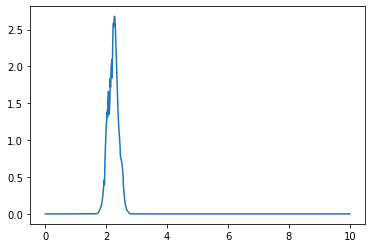

In [20]:
#calculate weights from zpdf
from __future__ import print_function

import numpy as np
from scipy.integrate import simps
from numpy import trapz

#print(zsearch)
#zsiz
#print(zpdflook)


zrange=np.arange(0,10.01,0.01)#z range for pdf 
zrangetemp=zrange[zrange<zsearch+zsiz]
zrangelook=zrangetemp[zrangetemp>zsearch-zsiz]
weight=[float('NaN')]*len(zlook)

for i in range(0,len(zlook)):
    zpdftemp2=zpdflook[i][zrange<zsearch+zsiz]
    zpdflook2=zpdftemp2[zrangetemp>zsearch-zsiz]
    # Compute the area using the composite trapezoidal rule.
    weight[i] = trapz(zpdflook2, dx=0.01)#we know the area of prob will be eaual to one

#print(weight)

print(zlook[2])
plt.plot(zrange,zpdflook[2])

In [41]:
#ri is the galaxy position
#rj is all the other galaxy positions 
#h is the kernel width at that redshift taken from the simulations 
#hi is the kernel width and needs to be adaptive
def Kernel(dist,h):
    K=(1/2*np.pi*h)*np.exp(-dist**2/(2*h**2))
    return K

In [55]:
#calculate distance from point to all other points
dist=[0]*len(weight)
for w in range(0,len(weight)):
    dist[w] = np.sqrt((alook-alook[w])**2+(dlook-dlook[w])**2)

In [54]:
def geo_mean(iterable):
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))

def geo_mean_overflow(iterable):
    a = np.log(iterable)
    return np.exp(a.sum()/len(a))

In [59]:
h=0.5#get this as a function as well for the model

Surhat=[0]*len(weight)

for i in range(0,len(weight)):
    sumw=np.ma.array(weight, mask=False)
    sumw.mask[i] = True
    Kproduct=sumw*Kernel(dist[i],h=h)#DOES THIS ALSO MASK THE VALUE HERE???
    Surhat[i]=(1/np.sum(sumw))*np.sum(Kproduct)

G=geo_mean_overflow(Surhat)#geometric mean of all Surhat values 
li=(G/Surhat)**0.5
hi=h*li

In [ ]:
x=alook
y=dlook
nbins=600
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]

In [ ]:
#FIND OUT IF ri IS THE SAME AS BEFORE HERE
#calculate distance from point to all other points
mdist=[0]*len(xi)
for w in range(0,len(weight)):
    mdist[w] = np.sqrt((xi-alook[w])**2+(dlook-dlook[w])**2)

# Simple Gaussian Kernel

In [ ]:
from scipy.stats import kde

x=alook
y=dlook
nbins=600
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

In [ ]:
from astropy.stats import sigma_clipped_stats
from photutils.datasets import make_100gaussians_image
from photutils import find_peaks
from astropy.visualization import simple_norm
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture

data = zi.reshape(xi.shape)/(np.max(zi.reshape(xi.shape)))
#mean, median, std = sigma_clipped_stats(data, sigma=3.0)
#print(mean,median,std)
threshold = 0.9#median + (4. * std)
tbl = find_peaks(data, threshold, box_size=11)
tbl['peak_value'].info.format = '%.8g'  # for consistent table output
tbl # print peaks

In [ ]:
print(xi[tbl['x_peak']])

In [ ]:
# Make the plot

plt.pcolormesh(xi, yi, data)
plt.plot(150.184235, 2.035242,'.')
#positions = np.transpose((xi[tbl['x_peak']], yi[tbl['y_peak']]))
#apertures = CircularAperture(positions, r=6.)
#apertures.plot(color='red', lw=1.0)
#plt.plot(xi[tbl['x_peak']][0][0], yi[tbl['y_peak']][0][0],'r.')

plt.colorbar()
plt.show()

# Selection by area on the sky and then redshift

In [ ]:
zcand=np.array([1.62,1.73,1.74,1.87,1.94,2.07,2.07,2.20,2.21,2.23,2.24,2.26,2.36,2.37,2.38,2.39,2.42,2.44,2.45,
      2.48,2.53,2.61,2.62,2.64,2.68,2.69,2.72,2.74,2.74,2.77,2.81,3.01,3.02,3.04,3.04,3.08])
acand=np.array([149.593,150.093,150.343,149.893,150.043,149.709,150.126,149.609,149.843,150.326,149.676,149.859,
      150.693,149.643,150.209,150.476,149.809,149.643,150.076,149.576,150.293,149.509,150.359,150.576,
      150.009,150.343,149.626,149.526,150.309,150.009,150.343,149.943,150.276,149.709,149.909,150.293])
dcand=np.array([1.89,2.207,2.407,1.907,2.174,2.007,2.24,1.774,1.807,1.89,2.007,1.94,2.19,1.974,1.707,2.657,2.124,
      2.674,2.274,1.957,2.324,1.907,2.674,2.674,2.207,2.557,2.324,1.907,2.507,1.974,2.64,1.774,2.324,
      1.907,2.007,2.507])
#corr=[0]*len(acand)
#for i in range(0,len(acand)):
#    corr[i]=[acand[i],dcand[i]]
print(max(zcand)-min(zcand))
print(np.median(zcand))

In [ ]:
plt.figure(dpi=500)
plt.plot(a,d,'.')
plt.plot(acand,dcand,'.')
plt.xlabel('alpha')
plt.ylabel('delta')
plt.plot(acand[34],dcand[34],'r.')

In [ ]:


catalog = SkyCoord(ra=anan*u.degree, dec=dnan*u.degree)  
siz=0.04#size used to look for objects close by, should be 2X the size of catalogmask size???
arrlength=(len(np.arange(min(anan),max(anan),siz))*len(np.arange(min(dnan),max(dnan),siz)))

print(arrlength)

idxcatalog=[float('NaN')] * arrlength
q=0

#thearange=np.arange(min(anan),max(anan),siz)
#thedrange=np.arange(min(dnan),max(dnan),siz)

#goes though all alpha/delta combinations
#for i in therange:
#    for w in thedrange:
#        scalarc = SkyCoord(i*u.deg, w*u.deg) 
#        d2d = scalarc.separation(catalog)
#        catalogmsk = d2d < siz*u.deg#multiply by 0.5???
#        idxcatalog[q] = [np.where(catalogmsk)[0]]
#        print(idxcatalog[q])
#        q=q+1

#goes through all alpha,delta points chosen       
corr=[[150.197509,2.003213]]

for i in corr:
        #print(i[0])
        scalarc = SkyCoord(i[0]*u.deg, i[1]*u.deg) 
        d2d = scalarc.separation(catalog)
        catalogmsk = d2d < (siz)*u.deg#multiply by 0.5???
        idxcatalog[q] = [np.where(catalogmsk)[0]]
        print(idxcatalog[q])
        q=q+1
#One entry in idxcatalog gives all the objects included in the search area

#Try to define i as the center position of the cluster (we have idx so we can calculate the mean/median) then define catalog
#as the cluster positions and calculate the separation. Lastly a mask can be applied using the maximum distance from the center
#(plus a bit maybe to include the farthest point?) and then all the redshift peaks and color plots. Remember the full catalog
#is still needed for 

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=500)
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(anan, dnan, znan, c=znan);

In [ ]:
ch=0#choses search region to look at
plt.figure(dpi=500)
plt.plot(anan[idxcatalog[ch]],dnan[idxcatalog[ch]],'.')
plt.xlabel('alpha')
plt.ylabel('delta')

In [ ]:
def find_peaks(a):
  x = np.array(a)
  max = np.max(x)
  lenght = len(a)
  ret = []
  for i in range(lenght):
      ispeak = True
      if i-1 > 0:
          ispeak &= (x[i] > 1.25 * x[i-1] and x[i]>5)
      if i+1 < lenght:
          ispeak &= (x[i] > 1.25 * x[i+1] and x[i]>5)

      #ispeak &= (x[i] > 0.05 * max)
      if ispeak:
          ret.append(i)
  return ret

In [ ]:
import scipy.stats
from scipy.stats import norm
from scipy.optimize import curve_fit

binwidth=0.1
#print(np.arange(min(znan[idxcatalog[ch]]), max(znan[idxcatalog[ch]]) + binwidth, binwidth))
counts, edges, plot=plt.hist(znan[idxcatalog[ch]],bins=np.arange(min(znan[idxcatalog[ch]]), max(znan[idxcatalog[ch]]) + binwidth, binwidth))
plt.xlabel('z')
bincenters = np.mean(np.vstack([edges[0:-1],edges[1:]]), axis=0)
#print(bincenters)


peaks=find_peaks(counts)
#print(peaks)

#print(counts)
print('Center of redshift bins for peaks:')
print(bincenters[peaks])
#print(edges[peaks])

In [ ]:
zsearch=4.7524#np.median(znan[idxcatalog[ch]])#redshift used to search for cluster
zsiz=binwidth#0.1#allowed difference in z 

ztemp=znan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
zclu=ztemp[ztemp>zsearch-zsiz]#array of z for the cluster

atemp=anan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
aclu=atemp[ztemp>zsearch-zsiz]#array of alpha for the cluster

dtemp=dnan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
dclu=dtemp[ztemp>zsearch-zsiz]#array of delta for the cluster

Gtemp=Gnan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
Gclu=Gtemp[ztemp>zsearch-zsiz]#array of G mag for the cluster

Rtemp=Rnan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
Rclu=Rtemp[ztemp>zsearch-zsiz]#array of delta for the cluster

Itemp=Inan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
Iclu=Itemp[ztemp>zsearch-zsiz]#array of delta for the cluster

Jtemp=Jnan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
Jclu=Jtemp[ztemp>zsearch-zsiz]#array of delta for the cluster

Htemp=Hnan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
Hclu=Htemp[ztemp>zsearch-zsiz]#array of delta for the cluster

Ktemp=Knan[idxcatalog[ch]][znan[idxcatalog[ch]]<zsearch+zsiz]
Kclu=Ktemp[ztemp>zsearch-zsiz]#array of delta for the cluster

#print(zclu)
#for i in range 

# Color-color and color-mag plots

In [ ]:
#Needs new appearant mags and selection criteria from paper

In [ ]:
plt.figure(dpi=500)
plt.plot(Hclu-Kclu,Jclu-Kclu,'.')
#plt.plot(Hclu[zclu<np.median(zclu)]-Kclu[zclu<np.median(zclu)],Jclu[zclu<np.median(zclu)]-Kclu[zclu<np.median(zclu)],'b.')
#plt.plot(Hclu[zclu>np.median(zclu)]-Kclu[zclu>np.median(zclu)],Jclu[zclu>np.median(zclu)]-Kclu[zclu>np.median(zclu)],'r.')
plt.xlabel('H-K')
plt.ylabel('J-K')

In [ ]:
plt.figure(dpi=500)
plt.plot(Kclu,Jclu-Kclu,'.')
#plt.plot(Kclu[zclu<2.0],Jclu[zclu<2.0]-Kclu[zclu<2.0],'b.')
#plt.plot(Kclu[zclu>2.0],Jclu[zclu>2.0]-Kclu[zclu>2.0],'r.')
plt.xlabel('K')
plt.ylabel('J-K')

In [ ]:
plt.figure(dpi=500)
plt.plot(Gclu-Iclu,Rclu-Gclu,'.')
plt.xlabel('g-i')
plt.ylabel('r-g')

In [ ]:
plt.figure(dpi=500)
plt.plot(Iclu,Gclu-Iclu,'.')
plt.xlabel('i')
plt.ylabel('r-g')